# Pandas
`02-pandas.ipynb`

## 특징
- 표(테이블) 데이터를 다루는데 특화
- 다양한 외부 소스에서 데이터 가져오기 (csv, excel, SQL db)
- 데이터 정제, 변환, 분석에 필요한 기능 다수
- 결측치 처리, 그룹화, 병합 작업에 효율


In [2]:
import numpy as np
import pandas as pd

# Numpy 배열
np_array = np.arange(1, 10).reshape(3, 3)
print(np_array)

# Pandas 데이터프레임
df = pd.DataFrame(np_array, columns=['A', 'B', 'C'])
print(df)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


## Series
- 1차원 배열(백터) with 레이블

In [3]:
import pandas as pd

# 기본 Series 생성 (별말 없으면 index)
s1 = pd.Series([1, 3, 5, 7, 9])
print(s1)

# 인덱스 지정
s2 = pd.Series([1, 3, 5, 7, 9], index=['a', 'b', 'c', 'd', 'e']) 
print(s2)

# dict로 생성
d = {'a': 1, 'b': 2, 'c': 3}
s3 = pd.Series(d)
print(s3)

# 단일값(스칼라)으로 Series 생성
s4 = pd.Series(5, index=['a', 'b', 'c'])
print(s4)

0    1
1    3
2    5
3    7
4    9
dtype: int64
a    1
b    3
c    5
d    7
e    9
dtype: int64
a    1
b    2
c    3
dtype: int64
a    5
b    5
c    5
dtype: int64


In [4]:
print(s2)
# 인덱스
print(s2.index)
# 데이터 타입
print(s2.dtype)
# 차원
print(s2.ndim)
# 크기
print(s2.size)
# 모양
print(s2.shape)

# 앞에 2개
print(s2.head(2))
# 뒤에 3개
print(s2.tail(3))
# 통계 요약
print(s2.describe())

a    1
b    3
c    5
d    7
e    9
dtype: int64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
int64
1
5
(5,)
a    1
b    3
dtype: int64
c    5
d    7
e    9
dtype: int64
count    5.000000
mean     5.000000
std      3.162278
min      1.000000
25%      3.000000
50%      5.000000
75%      7.000000
max      9.000000
dtype: float64


## DataFrame
- 2차원(매트릭스) with Label
- 행(row)과 열(column) 모두에 Label 설정

In [5]:
# 딕셔너리로부터 DataFrame 생성
data = {
    '이름': ['김철수', '이영희', '박민수', '정지영'],
    '나이': [25, 28, 22, 30],
    '성별': ['남', '여', '남', '여'],
    '점수': [85, 92, 78, 90]
}
df1 = pd.DataFrame(data)
print("딕셔너리로부터 DataFrame 생성:")
print(df1)

# 리스트의 리스트로부터 DataFrame 생성
data_list = [
    ['김철수', 25, '남', 85],
    ['이영희', 28, '여', 92],
    ['박민수', 22, '남', 78],
    ['정지영', 30, '여', 90]
]
df2 = pd.DataFrame(data_list, columns=['이름', '나이', '성별', '점수'])
print("\n리스트로부터 DataFrame 생성:")
print(df2)

딕셔너리로부터 DataFrame 생성:
    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
2  박민수  22  남  78
3  정지영  30  여  90

리스트로부터 DataFrame 생성:
    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
2  박민수  22  남  78
3  정지영  30  여  90


In [6]:
# Column 정보
print(df1.columns)
# 인덱스(row 정보)
print(df1.index)
# 값
print(df1.values)
# 데이터 타입
print(df1.dtypes)
# 크기
print(df1.size)
# 모양
print(df1.shape)


Index(['이름', '나이', '성별', '점수'], dtype='object')
RangeIndex(start=0, stop=4, step=1)
[['김철수' 25 '남' 85]
 ['이영희' 28 '여' 92]
 ['박민수' 22 '남' 78]
 ['정지영' 30 '여' 90]]
이름    object
나이     int64
성별    object
점수     int64
dtype: object
16
(4, 4)


In [7]:
print(df1.head(2))
print(df1.tail(2))
print(df1.describe())
print(df1['점수'].describe())

    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
    이름  나이 성별  점수
2  박민수  22  남  78
3  정지영  30  여  90
          나이         점수
count   4.00   4.000000
mean   26.25  86.250000
std     3.50   6.238322
min    22.00  78.000000
25%    24.25  83.250000
50%    26.50  87.500000
75%    28.50  90.500000
max    30.00  92.000000
count     4.000000
mean     86.250000
std       6.238322
min      78.000000
25%      83.250000
50%      87.500000
75%      90.500000
max      92.000000
Name: 점수, dtype: float64


In [8]:
# Index(데이터 레코드 별 PK)는 Pandas 의 핵심 기능

# 인덱스 재설정 (0 ~ N 으로 인덱스 설정)
df_reset = df1.reset_index()
print(df_reset)

# 인덱스 설정
df_set = df1.set_index('이름')
print(df_set)

# 다중 인덱스 설정
df_multi = df1.set_index(['성별', '이름'])
print(df_multi)

# 인덱스 이름 변경
df_renamed = df_set.rename_axis('학생명')
print(df_renamed)

   index   이름  나이 성별  점수
0      0  김철수  25  남  85
1      1  이영희  28  여  92
2      2  박민수  22  남  78
3      3  정지영  30  여  90
     나이 성별  점수
이름            
김철수  25  남  85
이영희  28  여  92
박민수  22  남  78
정지영  30  여  90
        나이  점수
성별 이름         
남  김철수  25  85
여  이영희  28  92
남  박민수  22  78
여  정지영  30  90
     나이 성별  점수
학생명           
김철수  25  남  85
이영희  28  여  92
박민수  22  남  78
정지영  30  여  90


## 데이터 접근 및 선택

### 열 선택과 인덱스 접근

In [9]:
# DF 에서 단일 열(col) 선택
name_col = df1['이름']
print(name_col, type(name_col))

# 다중 열 선택
subset = df1[['이름', '점수']]
print(subset)  # DataFrame 이 나온다

# key 접근이 아니라 속성(주어.속성) 방식 접근
print(df1.나이)

# 행 선택 (인덱스 기준)
print(df1[:2])  # 맨 앞 레코드 2개

0    김철수
1    이영희
2    박민수
3    정지영
Name: 이름, dtype: object <class 'pandas.core.series.Series'>
    이름  점수
0  김철수  85
1  이영희  92
2  박민수  78
3  정지영  90
0    25
1    28
2    22
3    30
Name: 나이, dtype: int64
    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92


## `loc` 와 `iloc`
- `loc` : 레이블 기반 인덱싱 (인덱스 이름 사용)
- `iloc` : 위치 기반 인덱싱 (정수 위치 사용)

In [10]:
# loc 예제

# 이름으로 인덱스 설정
df3 = df1.set_index('이름')
print(df3)

# 단일 행 선택
row = df3.loc['김철수']
print(row)

# 여러 행 선택
rows = df3.loc[['김철수', '이영희']]
print(rows)

# row + col 조합으로 선택
data = df3.loc[['김철수', '이영희'], ['나이', '점수']]
print(data)

     나이 성별  점수
이름            
김철수  25  남  85
이영희  28  여  92
박민수  22  남  78
정지영  30  여  90
나이    25
성별     남
점수    85
Name: 김철수, dtype: object
     나이 성별  점수
이름            
김철수  25  남  85
이영희  28  여  92
     나이  점수
이름         
김철수  25  85
이영희  28  92


In [11]:
# iloc 예제

print(df1)  # index 설정 없음

# 단일 행 -> df1[0] 아님X
first_row = df1.iloc[0]
print(first_row)

# 다중 행
rows = df1.iloc[1:3]  # df[1:3] 와 같으나, iloc 사용
print(rows)

# 행 + 열 선택 (i == 숫자 idx)
data = df1.iloc[[0, 2], [1, 3]]  # 0, 2 row 번호 / 1, 3 col 번호
print(data)



    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
2  박민수  22  남  78
3  정지영  30  여  90
이름    김철수
나이     25
성별      남
점수     85
Name: 0, dtype: object
    이름  나이 성별  점수
1  이영희  28  여  92
2  박민수  22  남  78
   나이  점수
0  25  85
2  22  78


### Boolean 인덱싱

In [12]:
print(df1)
print()

# 나이 25 초과 마스킹
mask = df1['나이'] > 25  # T, F 로 이루어진 Series
print(mask)
print()

# 필터링
filtered = df1[mask]
print(filtered)
print()

# 점수 80 이상, 성별 '여'
mask = (df1['점수'] >= 80) & (df1['성별'] == '여')
print(df1[mask])
print()

# 남성이거나, 점수 90점 이상
mask = (df1['점수'] >= 92) | (df1['성별'] == '남')
print(df1[mask])
print()

# query 메서드로 필터링
print('query:', df1.query('나이 >= 25 and 점수 > 85'))
print()

# isin 메서드로 필터링
names = ['김철수', '정지영', '누구']
mask = df1['이름'].isin(names)
print(df1[mask])

    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
2  박민수  22  남  78
3  정지영  30  여  90

0    False
1     True
2    False
3     True
Name: 나이, dtype: bool

    이름  나이 성별  점수
1  이영희  28  여  92
3  정지영  30  여  90

    이름  나이 성별  점수
1  이영희  28  여  92
3  정지영  30  여  90

    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
2  박민수  22  남  78

query:     이름  나이 성별  점수
1  이영희  28  여  92
3  정지영  30  여  90

    이름  나이 성별  점수
0  김철수  25  남  85
3  정지영  30  여  90


## 기술 통계

In [13]:
# 눈으로 확인하는 용도
# print(df1.describe())
# print(df1['점수'].describe())
print(df1)
print()

# 개별 통계 함수
print(df1['점수'].sum())  #총합
print(df1['점수'].mean())  # 평균
print(df1['점수'].median())  # 중앙
print(df1['점수'].std())  # 표준편차
print(df1['점수'].min())  # 최소
print(df1['점수'].max())  # 최대
print()

# 범주형 col 계산
print(df1['성별'].value_counts())

    이름  나이 성별  점수
0  김철수  25  남  85
1  이영희  28  여  92
2  박민수  22  남  78
3  정지영  30  여  90

345
86.25
87.5
6.238322424070967
78
92

성별
남    2
여    2
Name: count, dtype: int64


### 데이터 요약 및 그룹화

In [14]:
# df1 표에서 성별로 그룹핑하고, 점수의 평균 집계 (단순)
gender_score = df1.groupby('성별')['점수'].mean()
print(gender_score)
type(gender_score)  # pandas.core.series.Series
print()

# 성별에 따른 여러 통계량 (복잡)
stat = df1.groupby('성별').agg({
    # 컬럼: [정해진 키워드 (함수 이름)]
    '나이': ['mean', 'min', 'max'],
    '점수': ['mean', 'min', 'max', 'std']
})
print(stat)

성별
남    81.5
여    91.0
Name: 점수, dtype: float64

      나이            점수                  
    mean min max  mean min max       std
성별                                      
남   23.5  22  25  81.5  78  85  4.949747
여   29.0  28  30  91.0  90  92  1.414214


In [15]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

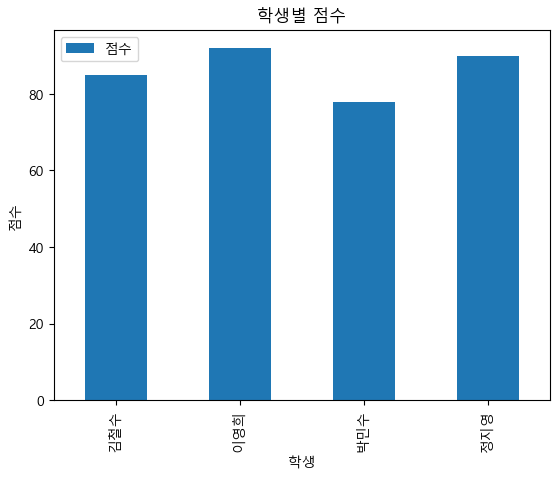

In [17]:
# 막대그래프

# (막대) 그래프 그리기
df1.plot(kind='bar', x='이름', y='점수')
# 그래프 설정하기
plt.title('학생별 점수')
plt.xlabel('학생')
plt.ylabel('점수')
plt.show()

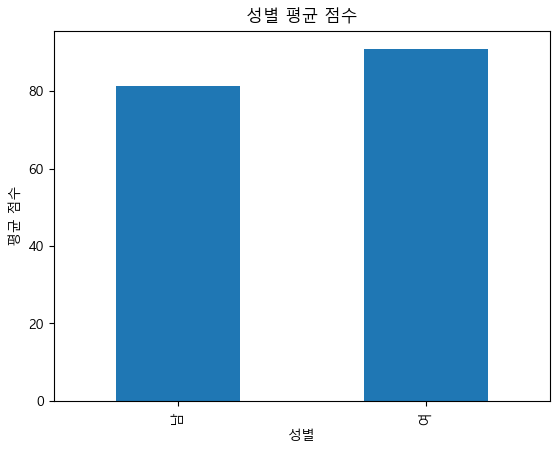

In [18]:
gender_score.plot(kind='bar')
plt.title('성별 평균 점수')
plt.xlabel('성별')
plt.ylabel('평균 점수')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 온라인 쇼핑몰 고객 데이터 (가상)
customer_data = {
    '고객ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '이름': ['김민수', '이지영', '박철호', '정수민', '최영희', '강도현', '윤서연', '임태혁', '송지원', '한미래'],
    '나이': [25, 32, 28, 35, 29, 31, 26, 33, 27, 30],
    '성별': ['남', '여', '남', '여', '여', '남', '여', '남', '여', '여'],
    '구매금액': [50000, 75000, 32000, 98000, 67000, 84000, 41000, 72000, 58000, 89000],
    '구매횟수': [3, 5, 2, 7, 4, 6, 2, 5, 3, 6],
    '회원등급': ['실버', '골드', '브론즈', '플래티넘', '골드', '골드', '실버', '골드', '실버', '플래티넘']
}

df = pd.DataFrame(customer_data)
print("온라인 쇼핑몰 고객 데이터:")
print(df)

온라인 쇼핑몰 고객 데이터:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
0  1001  김민수  25  남  50000     3    실버
1  1002  이지영  32  여  75000     5    골드
2  1003  박철호  28  남  32000     2   브론즈
3  1004  정수민  35  여  98000     7  플래티넘
4  1005  최영희  29  여  67000     4    골드
5  1006  강도현  31  남  84000     6    골드
6  1007  윤서연  26  여  41000     2    실버
7  1008  임태혁  33  남  72000     5    골드
8  1009  송지원  27  여  58000     3    실버
9  1010  한미래  30  여  89000     6  플래티넘


In [20]:
# 데이터 정보 확인 (행 개수, 열 개수, 컬럼명)
print(df.shape)
print(df.columns)
print()

# 데이터 타입 확인
print(df.dtypes)
print()

# 기술 통계 요약
print(df.describe())
print()

# 범주형 데이터 빈도 (성별 카운트, 등급 카운트)
print(df.value_counts('성별'))
print(df['회원등급'].value_counts())

(10, 7)
Index(['고객ID', '이름', '나이', '성별', '구매금액', '구매횟수', '회원등급'], dtype='object')

고객ID     int64
이름      object
나이       int64
성별      object
구매금액     int64
구매횟수     int64
회원등급    object
dtype: object

             고객ID         나이          구매금액       구매횟수
count    10.00000  10.000000     10.000000  10.000000
mean   1005.50000  29.600000  66600.000000   4.300000
std       3.02765   3.204164  21323.956272   1.766981
min    1001.00000  25.000000  32000.000000   2.000000
25%    1003.25000  27.250000  52000.000000   3.000000
50%    1005.50000  29.500000  69500.000000   4.500000
75%    1007.75000  31.750000  81750.000000   5.750000
max    1010.00000  35.000000  98000.000000   7.000000

성별
여    6
남    4
Name: count, dtype: int64
회원등급
골드      4
실버      3
플래티넘    2
브론즈     1
Name: count, dtype: int64


In [21]:
# 1. 특정 열 선택
print("1. 이름과 구매금액만 선택:")
print(df[['이름', '구매금액']])

# 2. 조건부 필터링
print("\n2. 구매금액이 70000원 이상인 고객:")
print(df[df['구매금액'] >= 70_000])

# 3. 다중 조건 필터링
print("\n3. 여성이면서 구매횟수가 4회 이상인 고객:")
print(df[(df['성별'] == '여') & (df['구매횟수'] >= 4)])

# 4. 특정 값들로 필터링
print("\n4. 골드 또는 플래티넘 회원:")
print(df[(df['회원등급'] == '골드') | (df['회원등급'] == '플래티넘')])  # print(df['회원등급'].isin(['골드', '플래티넘]))

1. 이름과 구매금액만 선택:
    이름   구매금액
0  김민수  50000
1  이지영  75000
2  박철호  32000
3  정수민  98000
4  최영희  67000
5  강도현  84000
6  윤서연  41000
7  임태혁  72000
8  송지원  58000
9  한미래  89000

2. 구매금액이 70000원 이상인 고객:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
1  1002  이지영  32  여  75000     5    골드
3  1004  정수민  35  여  98000     7  플래티넘
5  1006  강도현  31  남  84000     6    골드
7  1008  임태혁  33  남  72000     5    골드
9  1010  한미래  30  여  89000     6  플래티넘

3. 여성이면서 구매횟수가 4회 이상인 고객:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
1  1002  이지영  32  여  75000     5    골드
3  1004  정수민  35  여  98000     7  플래티넘
4  1005  최영희  29  여  67000     4    골드
9  1010  한미래  30  여  89000     6  플래티넘

4. 골드 또는 플래티넘 회원:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
1  1002  이지영  32  여  75000     5    골드
3  1004  정수민  35  여  98000     7  플래티넘
4  1005  최영희  29  여  67000     4    골드
5  1006  강도현  31  남  84000     6    골드
7  1008  임태혁  33  남  72000     5    골드
9  1010  한미래  30  여  89000     6  플래티넘


In [22]:
# [안배웠지만 검색해서 적용해보기]

# 구매금액 기준 정렬
print("구매금액 기준 내림차순 정렬:")
# SELECT 이름, 구매금액, 회원등급 FROM df ORDER BY 구매금액 DESC
print(df.sort_values('구매금액', ascending=False)[['이름', '구매금액', '회원등급']])

# 여러 기준으로 정렬
print("\n회원등급별, 구매금액별 정렬:")
print(df.sort_values(['회원등급', '구매금액'], ascending=[True, False]))

구매금액 기준 내림차순 정렬:
    이름   구매금액  회원등급
3  정수민  98000  플래티넘
9  한미래  89000  플래티넘
5  강도현  84000    골드
1  이지영  75000    골드
7  임태혁  72000    골드
4  최영희  67000    골드
8  송지원  58000    실버
0  김민수  50000    실버
6  윤서연  41000    실버
2  박철호  32000   브론즈

회원등급별, 구매금액별 정렬:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
5  1006  강도현  31  남  84000     6    골드
1  1002  이지영  32  여  75000     5    골드
7  1008  임태혁  33  남  72000     5    골드
4  1005  최영희  29  여  67000     4    골드
2  1003  박철호  28  남  32000     2   브론즈
8  1009  송지원  27  여  58000     3    실버
0  1001  김민수  25  남  50000     3    실버
6  1007  윤서연  26  여  41000     2    실버
3  1004  정수민  35  여  98000     7  플래티넘
9  1010  한미래  30  여  89000     6  플래티넘


In [23]:
# 금액 계산 (평균, 중앙, 최소, 최대, 표준편차)
print("구매금액 통계:")
print('평균', df['구매금액'].mean())
print('중앙', df['구매금액'].median())
print('최소', df['구매금액'].min())
print('최대', df['구매금액'].max())
print('표준편차', df['구매금액'].std())

# 횟수 계산 (평균, 중앙, 최소, 최대, 표준편차)
print("\n구매횟수 통계:")
print('평균', df['구매횟수'].mean())
print('중앙', df['구매횟수'].median())
print('최소', df['구매횟수'].min())
print('최대', df['구매횟수'].max())
print('표준편차', df['구매횟수'].std())

# 상위/하위
print("\n구매금액 상위/하위:")
print(df.nlargest(3, '구매금액'))
print(df.nsmallest(3, '구매금액'))

구매금액 통계:
평균 66600.0
중앙 69500.0
최소 32000
최대 98000
표준편차 21323.95627249107

구매횟수 통계:
평균 4.3
중앙 4.5
최소 2
최대 7
표준편차 1.766981104093143

구매금액 상위/하위:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
3  1004  정수민  35  여  98000     7  플래티넘
9  1010  한미래  30  여  89000     6  플래티넘
5  1006  강도현  31  남  84000     6    골드
   고객ID   이름  나이 성별   구매금액  구매횟수 회원등급
2  1003  박철호  28  남  32000     2  브론즈
6  1007  윤서연  26  여  41000     2   실버
0  1001  김민수  25  남  50000     3   실버


In [24]:
# 성별별(Group) 기본 분석  
print("성별별 분석:")

print('\n고객 수, 평균 구매 금액:')
gender_group = df.groupby('성별')
result = gender_group['구매금액'].agg(['count', 'mean'])
# AS 로 컬럼명 바꾸기 == .rename()
print(result.rename(columns={'count': '고객수', 'mean': '평균구매금액'}))

print('\n평균 구매 횟수')
print(gender_group['구매횟수'].mean())

성별별 분석:

고객 수, 평균 구매 금액:
    고객수        평균구매금액
성별                   
남     4  59500.000000
여     6  71333.333333

평균 구매 횟수
성별
남    4.0
여    4.5
Name: 구매횟수, dtype: float64


In [25]:
# 등급별(Group) 기본분석
grade_group = df.groupby('회원등급')

print('\n회원 등급별 평균 구매 금액 분석')
print(grade_group['구매금액'].agg('mean'))
print('\n회원 등급별 평균 구매 횟수 분석')
print(grade_group['구매횟수'].mean())


회원 등급별 평균 구매 금액 분석
회원등급
골드      74500.000000
브론즈     32000.000000
실버      49666.666667
플래티넘    93500.000000
Name: 구매금액, dtype: float64

회원 등급별 평균 구매 횟수 분석
회원등급
골드      5.000000
브론즈     2.000000
실버      2.666667
플래티넘    6.500000
Name: 구매횟수, dtype: float64


## 결측치 처리

In [26]:
import numpy as np
import pandas as pd

data = {
    '이름': ['김철수', '이영희', '박민수', np.nan, '정지영'],
    '나이': [25, 28, np.nan, 30, 22],
    '성별': ['남', '여', '남', np.nan, '여'],
    '직업': ['회사원', np.nan, '자영업', '공무원', '회사원'],
    '급여': [3500, 4200, np.nan, 3800, 3200]
}

df = pd.DataFrame(data)

### 결측치 확인

In [39]:
print('original \n', df)

# 결측지 자체를 확인 (T/F)
print(df.isna())
print(df.isnull())  # 같음

# 결측치 총 개수
df.isna().sum()  # 각 열별 결측치 개수

# 결측치 비율
df.isna().mean() * 100

# df 의 정보 (db 스키마 확인과 비슷)
df.info()

# 결측치가 포함된 열을 확인
df.isna().any()  # axis=0 을 써주는 게 확실함

# 결측치가 포함된 행을 확인
m1 = df.isna().any(axis=1)  # 하나라도 결측치가 있다 => False 가 꽉 찬 것

# 결측치가 없는 행을 확인
m2 = df.notna().all(axis=1)  # 하나도 결측치가 없다 => True 가 꽉 찬 것

df[m1]  # 결측치 있는 애들만 나옴
df[m2]  # 결측치 없는 애들만 나옴

original 
    정수형  실수형 문자형   불리언         날짜    혼합형
0    1  1.1   1  True 2023-01-01      1
1    2  2.2   2  True 2023-02-01    2.2
2    3  3.3   3  True 2023-03-01  three
3    4  4.4   4  True 2023-04-01      4
4    5  5.5   5  True 2023-05-01    NaN
     정수형    실수형    문자형    불리언     날짜    혼합형
0  False  False  False  False  False  False
1  False  False  False  False  False  False
2  False  False  False  False  False  False
3  False  False  False  False  False  False
4  False  False  False  False  False  False
     정수형    실수형    문자형    불리언     날짜    혼합형
0  False  False  False  False  False  False
1  False  False  False  False  False  False
2  False  False  False  False  False  False
3  False  False  False  False  False  False
4  False  False  False  False  False  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   정수형     5 non-null      int6

,정수형,실수형,문자형,불리언,날짜,혼합형
0,1,1.1,1,True,2023-01-01,1
1,2,2.2,2,True,2023-02-01,2.2
2,3,3.3,3,True,2023-03-01,three
3,4,4.4,4,True,2023-04-01,4
4,5,5.5,5,True,2023-05-01,NaN


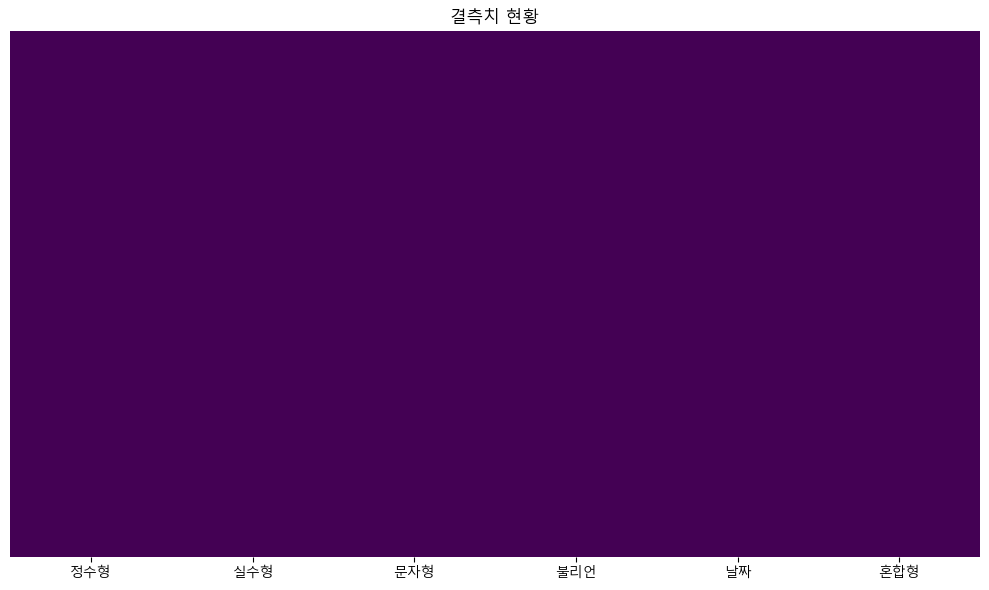

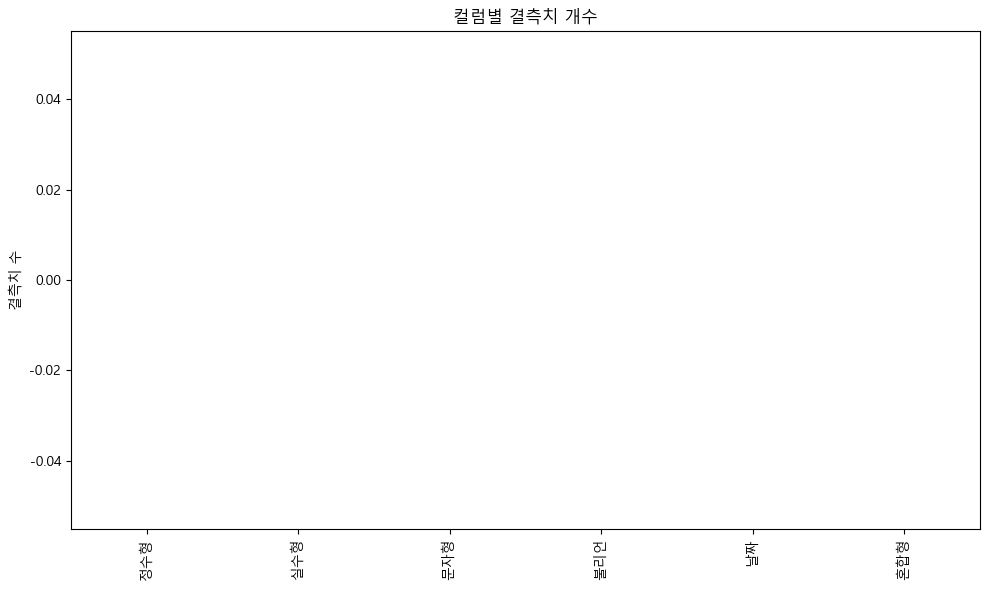

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('결측치 현황')
plt.tight_layout()
plt.show()

# 결측치 개수 막대 그래프
plt.figure(figsize=(10, 6))
df.isna().sum().plot(kind='bar')
plt.title('컬럼별 결측치 개수')
plt.ylabel('결측치 수')
plt.tight_layout()
plt.show()

### 결측치 삭제

In [28]:
# 결측치가 있는 모든 행을 삭제 (새로 리턴)
df.dropna(axis=0)

# 특정 열의 결측치가 있는 행만 삭제 -> 이름, 성별이 없는 행은 삭제
df.dropna(subset=['이름', '성별'], axis=0)

# 모든 값이 결측치면 삭제
df.dropna(how='all', axis=0)

# 결측치가 있는 모든 열을 삭제
df.dropna(axis=1)

""
0
1
2
3
4


### 결측치 채우기

In [29]:
# 특정 값으로 결측치 채우기
df.fillna(0)

# 열별로 다른 값 쓰기
fill_values = {
    '이름': '익명',
    '나이': 20,
    '성별': '미입력',
    '직업': '기타',
    '급여': df['급여'].mean()  # 평균
}
df.fillna(fill_values)

# 앞에 사람 데이터 복붙
df.fillna(method='ffill')  # 과거버전 용. 미래에는 에러남
df.ffill()  # 앞사람 데이터로 채우기
df.bfill()  # 뒷사람 데이터로 채우기

C:\Users\amy\AppData\Local\Temp\ipykernel_3860\3436100071.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')  # 과거버전 용. 미래에는 에러남


,이름,나이,성별,직업,급여
0,김철수,25.0,남,회사원,3500.0
1,이영희,28.0,여,자영업,4200.0
2,박민수,30.0,남,자영업,3800.0
3,정지영,30.0,여,공무원,3800.0
4,정지영,22.0,여,회사원,3200.0


In [30]:
# 시계열 데이터 (시간)
dates = pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-05', '2023-01-10'])
data = [1, np.nan, np.nan, 10]

time_data = pd.DataFrame({'value': data}, index=dates)

In [31]:
# 보간법 - interpolate (알려진 값으로 모르는 걸 추정)

# 선형 보간법 (1차 함수를 그려서 추정) -> 시간의 흐름은 신경쓰지 않음
time_data.interpolate(method='linear')

# 시간 기반 -> 시간의 흐름까지 고려 하여 채움
time_data.interpolate(method='time')

,value
2023-01-01,1.0
2023-01-02,2.0
2023-01-05,5.0
2023-01-10,10.0


## 데이터 타입 변환

In [ ]:
# 문자열 데이터 처리를 위한 샘플 데이터
data = {
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민'],
    '이메일': ['kim@example.com', 'lee.younghee@company.co.kr', 
              'park_ms@gmail.com', 'jyjeong@school.edu', 'choi@domain.net'],
    '전화번호': ['010-1234-5678', '02-987-6543', '010 3456 7890', 
              '01098765432', '+82-10-5555-6666'],
    '취미': ['축구,야구,농구', '여행,독서', '게임,음악,영화',
            '요리,베이킹', '등산,자전거,수영']
}

df = pd.DataFrame(data)
print("원본 데이터:")
print(df)

# 1. 기본 문자열 메서드
# 대소문자 변환 (영문에 적용)
print("\n이메일 대문자 변환:")
print(df['이메일'].str.upper())

# 문자열 길이
print("\n이름 길이:")
print(df['이름'].str.len())

# 특정 문자열 포함 여부
print("\n지메일 사용자:")
print(df['이메일'].str.contains('gmail'))

# 문자열 교체 (Series 데이터 각각에 str 에서 사용하는 메서드를 쓰겠다.)
print("\n전화번호 형식 통일 (하이픈 제거):")
print(df['전화번호'].str.replace('-', '').str.replace(' ', ''))

# 2. 문자열 추출
# 처음 두 글자 추출 (성씨)
print("\n성씨 추출:")
print(df['이름'].str[:1])

# 정규표현식 사용한 추출
print("\n이메일 도메인 추출:")
print(df['이메일'].str.extract(r'@([^.]+)'))  # @ 다음에 오는 도메인 이름 추출

# 3. 문자열 분할
# 구분자로 분할
print("\n취미 분할:")
hobbies_split = df['취미'].str.split(',')
print(hobbies_split)

# 분할 후 특정 위치 요소 선택
print("\n첫 번째 취미만 선택:")
print(df['취미'].str.split(',').str[0])  

# 4. 응용: 이메일에서 사용자명과 도메인 분리
print("\n이메일 분해:")
df[['사용자명', '도메인']] = df['이메일'].str.split('@', expand=True)  # expand False 면 Series(list) / True 면 DF로 쪼갬
print(df[['이메일', '사용자명', '도메인']])

원본 데이터:
    이름                         이메일              전화번호         취미
0  김철수             kim@example.com     010-1234-5678   축구,야구,농구
1  이영희  lee.younghee@company.co.kr       02-987-6543      여행,독서
2  박민수           park_ms@gmail.com     010 3456 7890   게임,음악,영화
3  정지영          jyjeong@school.edu       01098765432     요리,베이킹
4  최동민             choi@domain.net  +82-10-5555-6666  등산,자전거,수영

이메일 대문자 변환:
0               KIM@EXAMPLE.COM
1    LEE.YOUNGHEE@COMPANY.CO.KR
2             PARK_MS@GMAIL.COM
3            JYJEONG@SCHOOL.EDU
4               CHOI@DOMAIN.NET
Name: 이메일, dtype: object

이름 길이:
0    3
1    3
2    3
3    3
4    3
Name: 이름, dtype: int64

지메일 사용자:
0    False
1    False
2     True
3    False
4    False
Name: 이메일, dtype: bool

전화번호 형식 통일 (하이픈 제거):
0      01012345678
1        029876543
2      01034567890
3      01098765432
4    +821055556666
Name: 전화번호, dtype: object

성씨 추출:
0    김
1    이
2    박
3    정
4    최
Name: 이름, dtype: object

이메일 도메인 추출:
         0
0  example
1  company


In [35]:
# 데이터 타입 변환
data = {
    '정수형': ['1', '2', '3', '4', '5'],
    '실수형': ['1.1', '2.2', '3.3', '4.4', '5.5'],
    '문자형': [1, 2, 3, 4, 5],
    '불리언': ['True', 'False', 'True', 'False', 'True'],
    '날짜': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    '혼합형': ['1', '2.2', 'three', '4', 'NaN']
}

df = pd.DataFrame(data)

# str -> int
df['정수형'] = df['정수형'].astype(int)

# str -> float
df['실수형'] = df['실수형'].astype(float)

# int -> str
df['문자형'] = df['문자형'].astype(str)

# str -> bool
df['불리언'] = df['불리언'].astype(bool)


# 혼합형은 어떻게 처리하는가? -> 전체적으로 바꿀 수 있는지 시도 | 오류 처리 옵션
# 에러 처리
try:
    pd.to_numeric(df['혼합형'])
except ValueError as e:
    print(f'Error: {e}')

# 변환 불가능하면, NaN 으로 처리
pd.to_numeric(df['혼합형'], errors='coerce')

# 변환 불가 -> 원래 데이터 유지
pd.to_numeric(df['혼합형'], errors='ignore')

# to_datetime()
df['날짜'] = pd.to_datetime(df['날짜'])

df.info()

Error: Unable to parse string "three" at position 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   정수형     5 non-null      int64         
 1   실수형     5 non-null      float64       
 2   문자형     5 non-null      object        
 3   불리언     5 non-null      bool          
 4   날짜      5 non-null      datetime64[ns]
 5   혼합형     5 non-null      object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 337.0+ bytes


C:\Users\amy\AppData\Local\Temp\ipykernel_3860\2496538743.py:37: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  pd.to_numeric(df['혼합형'], errors='ignore')


## 행/열 처리

### 열 (col) 처리

In [41]:
data = {
    '학번': ['S001', 'S002', 'S003', 'S004', 'S005'],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민'],
    '국어': [85, 92, 78, 90, 85],
    '영어': [82, 95, 75, 88, 90],
    '수학': [88, 90, 80, 95, 82],
    '과학': [76, 82, 75, 84, 88],
    '사회': [92, 86, 85, 91, 78],
    '비고': ['', '', '', '', ''],  # 빈 열
    '임시데이터': [0, 0, 0, 0, 0]   # 불필요한 열
}

df = pd.DataFrame(data)
print("원본 데이터:")
print(df)

# 1. 단일 열 삭제
df_drop_single = df.drop('비고', axis=1)  # axis=1은 열 방향
print("\n'비고' 열 삭제 후:")
print(df_drop_single)

# 2. 여러 열 한 번에 삭제
df_drop_multi = df.drop(['비고', '임시데이터'], axis=1)
print("\n여러 열 삭제 후:")
print(df_drop_multi)

# 3. inplace 파라미터를 사용하여 원본 데이터 직접 변경
df.drop(['비고', '임시데이터'], axis=1, inplace=True)
print("\n원본 데이터에서 직접 열 삭제:")
print(df)

# 4. 열 이름 변경
df.columns = ['학번', '이름', '국어점수', '영어점수', '수학점수', '과학점수', '사회점수']
print("\n열 이름 변경 후:")
print(df)

# 5. rename 메서드로 특정 열 이름만 변경
df_renamed = df.rename(columns={
    '국어점수': '국어',
    '영어점수': '영어',
    '수학점수': '수학'
})
print("\nrename 메서드로 특정 열 이름 변경:")
print(df_renamed)

# 6. 열 순서 변경
df_reordered = df[['이름', '학번', '국어점수', '영어점수', '수학점수', '과학점수', '사회점수']]
print("\n열 순서 변경:")
print(df_reordered)

# 7. 열 추가
df['총점'] = df['국어점수'] + df['영어점수'] + df['수학점수'] + df['과학점수'] + df['사회점수']
df['평균'] = df['총점'] / 5
print("\n총점과 평균 열 추가:")
print(df)

# 8. 조건에 따라 새 열 추가
df['성적등급'] = pd.cut(df['평균'], bins=[0, 70, 80, 90, 100], labels=['D', 'C', 'B', 'A'])
print("\n성적등급 열 추가:")
print(df)


원본 데이터:
     학번   이름  국어  영어  수학  과학  사회 비고  임시데이터
0  S001  김철수  85  82  88  76  92         0
1  S002  이영희  92  95  90  82  86         0
2  S003  박민수  78  75  80  75  85         0
3  S004  정지영  90  88  95  84  91         0
4  S005  최동민  85  90  82  88  78         0

'비고' 열 삭제 후:
     학번   이름  국어  영어  수학  과학  사회  임시데이터
0  S001  김철수  85  82  88  76  92      0
1  S002  이영희  92  95  90  82  86      0
2  S003  박민수  78  75  80  75  85      0
3  S004  정지영  90  88  95  84  91      0
4  S005  최동민  85  90  82  88  78      0

여러 열 삭제 후:
     학번   이름  국어  영어  수학  과학  사회
0  S001  김철수  85  82  88  76  92
1  S002  이영희  92  95  90  82  86
2  S003  박민수  78  75  80  75  85
3  S004  정지영  90  88  95  84  91
4  S005  최동민  85  90  82  88  78

원본 데이터에서 직접 열 삭제:
     학번   이름  국어  영어  수학  과학  사회
0  S001  김철수  85  82  88  76  92
1  S002  이영희  92  95  90  82  86
2  S003  박민수  78  75  80  75  85
3  S004  정지영  90  88  95  84  91
4  S005  최동민  85  90  82  88  78

열 이름 변경 후:
     학번   이름  국어점수  영어점수  수학점수  과학점수  사회점

### 행 (row) 처리

In [42]:
data = {
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태영', '한미래', '송지원'],
    '나이': [25, 28, 22, 35, 29, 31, 26, 33, 27, np.nan],
    '성별': ['남', '여', '남', '여', '남', '남', '여', '남', '여', '여'],
    '부서': ['영업', '인사', '개발', '영업', '인사', '개발', '개발', '영업', '인사', np.nan],
    '급여': [3500, 4200, 3800, 5400, 4100, 3900, 4300, 5100, 3700, 4200]
}

df = pd.DataFrame(data)
print("원본 데이터:")
print(df)

# 1. 인덱스로 행 삭제
df_drop_index = df.drop(0)  # 첫 번째 행 삭제
print("\n첫 번째 행 삭제:")
print(df_drop_index)

# 2. 여러 행 한 번에 삭제
df_drop_multi = df.drop([0, 2, 4])  # 0, 2, 4번 행 삭제
print("\n여러 행 삭제:")
print(df_drop_multi)

# 3. 조건을 기준으로 행 필터링
# 나이가 30 미만인 직원만 선택
young_employees = df[df['나이'] < 30]
print("\n나이가 30 미만인 직원:")
print(young_employees)

# 4. 결측치가 있는 행 제거
df_no_na = df.dropna()
print("\n결측치가 없는 행만 선택:")
print(df_no_na)

# 5. 특정 열에 결측치가 있는 행만 제거
df_no_na_age = df.dropna(subset=['나이'])
print("\n나이 열에 결측치가 없는 행만 선택:")
print(df_no_na_age)

# 6. 중복된 행 확인 및 제거
# 중복 데이터 생성을 위해 행 추가
duplicated_df = pd.concat([df, df.iloc[2:4]], ignore_index=True)
print("\n중복 행이 있는 데이터:")
print(duplicated_df)

# 중복 행 확인
print("\n중복 여부:")
print(duplicated_df.duplicated())

# 중복 행 제거
df_no_dup = duplicated_df.drop_duplicates()
print("\n중복 행 제거 후:")
print(df_no_dup)

# 7. 행 순서 변경 (정렬)
df_sorted = df.sort_values('급여', ascending=False)
print("\n급여 기준 내림차순 정렬:")
print(df_sorted)

# 여러 열을 기준으로 정렬
df_multi_sorted = df.sort_values(['부서', '급여'], ascending=[True, False])
print("\n부서별 급여 내림차순 정렬:")
print(df_multi_sorted)

# 8. 행 인덱스 재설정
df_reset = df.sort_values('급여', ascending=False).reset_index(drop=True)
print("\n정렬 후 인덱스 재설정:")
print(df_reset)

원본 데이터:
    이름    나이 성별   부서    급여
0  김철수  25.0  남   영업  3500
1  이영희  28.0  여   인사  4200
2  박민수  22.0  남   개발  3800
3  정지영  35.0  여   영업  5400
4  최동민  29.0  남   인사  4100
5  강준호  31.0  남   개발  3900
6  윤서연  26.0  여   개발  4300
7  임태영  33.0  남   영업  5100
8  한미래  27.0  여   인사  3700
9  송지원   NaN  여  NaN  4200

첫 번째 행 삭제:
    이름    나이 성별   부서    급여
1  이영희  28.0  여   인사  4200
2  박민수  22.0  남   개발  3800
3  정지영  35.0  여   영업  5400
4  최동민  29.0  남   인사  4100
5  강준호  31.0  남   개발  3900
6  윤서연  26.0  여   개발  4300
7  임태영  33.0  남   영업  5100
8  한미래  27.0  여   인사  3700
9  송지원   NaN  여  NaN  4200

여러 행 삭제:
    이름    나이 성별   부서    급여
1  이영희  28.0  여   인사  4200
3  정지영  35.0  여   영업  5400
5  강준호  31.0  남   개발  3900
6  윤서연  26.0  여   개발  4300
7  임태영  33.0  남   영업  5100
8  한미래  27.0  여   인사  3700
9  송지원   NaN  여  NaN  4200

나이가 30 미만인 직원:
    이름    나이 성별  부서    급여
0  김철수  25.0  남  영업  3500
1  이영희  28.0  여  인사  4200
2  박민수  22.0  남  개발  3800
4  최동민  29.0  남  인사  4100
6  윤서연  26.0  여  개발  4300
8  한미래  27.0  여